<a href="https://colab.research.google.com/github/2303A52151/AIML_2303A52151/blob/main/AIML_labexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay

In [2]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42) # This line has a syntax error, but I don't know what make_classification expects.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
model = LogisticRegression(penalty=None, solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [4]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [5]:
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

Confusion Matrix:
 [[135  27]
 [ 21 117]]
Accuracy: 0.84
F1-Score: 0.83


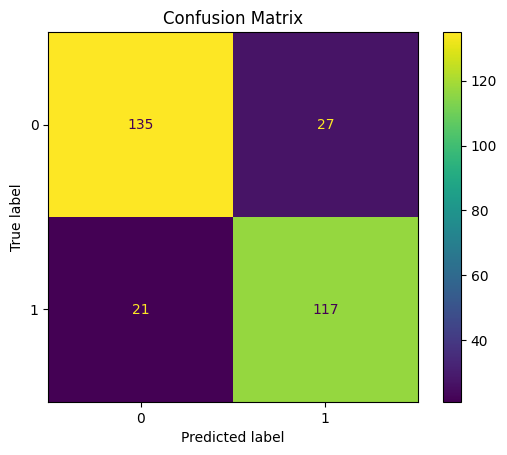

In [6]:

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()

In [7]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [17]:
def plot_decision_boundary(X, y, model, original_X):
    """
    Plots the decision boundary of a classification model.

    Args:
        X: The input features used for plotting (likely 2D).
        y: The target variable.
        model: The trained classification model.
        original_X: The original dataset with all features used to train the model.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Create a dataset with the same number of features as the original dataset
    # by using the grid values for the first two features and filling the rest with zeros
    plot_data = np.zeros((xx.ravel().shape[0], original_X.shape[1]))
    plot_data[:, :2] = np.c_[xx.ravel(), yy.ravel()]

    Z = model.predict(plot_data)  # Predict using the formatted data
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [18]:
model_regularized = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
model_regularized.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred_regularized = model_regularized.predict(X_test)
accuracy_reg = accuracy_score(y_test, y_pred_regularized)
f1_reg = f1_score(y_test, y_pred_regularized)

In [20]:
print(f"Regularized Model Accuracy: {accuracy_reg:.2f}")
print(f"Regularized Model F1-Score: {f1_reg:.2f}")

Regularized Model Accuracy: 0.84
Regularized Model F1-Score: 0.83


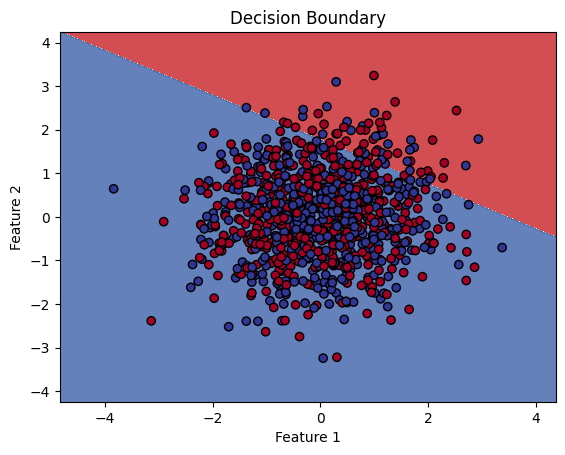

In [22]:
plot_decision_boundary(X, y, model_regularized, X) # Pass X as original_X assuming X is the original dataset